CLASSIFYING CHEST X-RAY IMAGES INTO NORMAL OR PNEUMONIC

This dataset is available on Kaggle.
Dataset summary:
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

1) IMPORTING PACKAGES AND IMAGES

This project is done with tensorflow using Convolution neural networks.
All the relevant packages are imported below

In [26]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import zipfile

Let us take a look at the number of training images in each category.
We have 3875 pneumonia images and 1341 normal images.

In [27]:
pneumonia_dir = os.path.join ('D:\\COursera\\chest-xray-pneumonia\\chest_xray\\train\\PNEUMONIA')
normal_dir = os.path.join ('D:\\COursera\\chest-xray-pneumonia\\chest_xray\\train\\NORMAL')


print('total training pneumonia images:', len(os.listdir(pneumonia_dir)))
print('total training normal images:', len(os.listdir(normal_dir)))


total training pneumonia images: 3875
total training normal images: 1341


2) DATA AUGMENTATION

To avoid overfitting, let us apply some data augmentation techniques
Data augmentation takes the approach of generating more training data
from existing training samples, by augmenting the samples via a number of random
transformations that yield believable-looking images.

All images are resized to (300,300)

In [28]:
TRAINING_DIR = 'D:\\COursera\\chest-xray-pneumonia\\chest_xray\\train'
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	  rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [29]:

VALIDATION_DIR = 'D:\\COursera\\chest-xray-pneumonia\\chest_xray\\test'
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [32]:
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(300,300),
	class_mode='binary'
)



Found 5216 images belonging to 2 classes.


In [33]:
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(300,300),
	class_mode='binary'
)

Found 624 images belonging to 2 classes.


2) CONVOLUTION NEURAL NETWORK

I have used 4 convolution layers with reLU activation function.
However, for the last layer, a sigmoid activation function is used since we are dealiing with binary classification.

In [34]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [39]:
model.summary()

model.compile(loss = 'binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs=4, validation_data = validation_generator, verbose = 1)
#model.save("rps.h5")

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 33, 33, 128)      

We have attained an accuracy of 86% and a validation accuracy of 85%

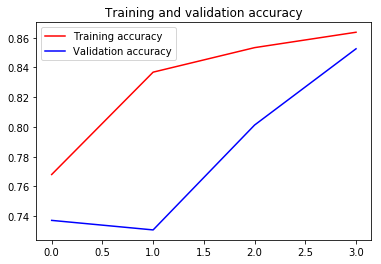

<Figure size 432x288 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

Let us save the model

In [69]:
import keras
model.save("pneumonia.h5")

3) PREDICTION

We have 8 images in each class in the validation set. Let us import these images and make predictions.
First we upload the normal images.

In [75]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np
import os

# image folder
folder_path = 'D:\\COursera\\chest-xray-pneumonia\\chest_xray\\val\\NORMAL'
# path to model
model_path = 'C:\\Users\\Naren\\Documents\\Codes\\pneumonia.h5'
# dimensions of images
img_width, img_height = 300, 300

# load the trained model
model = tf.keras.models.load_model(model_path)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

[[1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In the normal images, only one prediction has gone wrong

Let us now import the pneumonic images and make predictions. 

In [76]:

# image folder
folder_path = 'D:\\COursera\\chest-xray-pneumonia\\chest_xray\\val\\PNEUMONIA'
# path to model
model_path = 'C:\\Users\\Naren\\Documents\\Codes\\pneumonia.h5'
# dimensions of images
img_width, img_height = 300, 300

# load the trained model
model = tf.keras.models.load_model(model_path)
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# load all images into a list
images = []
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    images.append(img)

# stack up images list to pass for prediction
images = np.vstack(images)
classes = model.predict_classes(images, batch_size=10)
print(classes)

[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


All the predictions are correct!

REFERENCES:
https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia